##  Sleeping Sound in Seattle: Descriptive and Predictive Analytics


In [1]:
#Import revelevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Import listings and reviews data

listings = pd.read_csv(r'C:\Users\johna\OneDrive\Desktop\udacity\listings.csv')


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [6]:
#Secelecting the revelevant columns

df = listings[["host_response_rate","host_response_time", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews","cleaning_fee","review_scores_cleanliness", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month",'availability_365']]

In [7]:
#% of NaN values

(len(df) - df.count()) / len(df) * 100


host_response_rate           13.698271
host_response_time           13.698271
host_acceptance_rate         20.246202
host_is_superhost             0.052383
host_listings_count           0.052383
zipcode                       0.183342
property_type                 0.026192
room_type                     0.000000
accommodates                  0.000000
bathrooms                     0.419068
bedrooms                      0.157150
beds                          0.026192
price                         0.000000
number_of_reviews             0.000000
cleaning_fee                 26.977475
review_scores_cleanliness    17.103195
review_scores_rating         16.946045
cancellation_policy           0.000000
reviews_per_month            16.422211
availability_365              0.000000
dtype: float64

In [8]:
df.dtypes

host_response_rate            object
host_response_time            object
host_acceptance_rate          object
host_is_superhost             object
host_listings_count          float64
zipcode                       object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
price                         object
number_of_reviews              int64
cleaning_fee                  object
review_scores_cleanliness    float64
review_scores_rating         float64
cancellation_policy           object
reviews_per_month            float64
availability_365               int64
dtype: object

In [9]:
#Cleaning data

df['host_response_rate'] = df['host_response_rate'].str.replace('%','').astype('float64')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%','').astype('float64')

df['host_is_superhost'] = np.where(df['host_is_superhost'] == 't',1,0)

df['price'] = df['price'].str.replace('[$, ]','').astype('float64')

df['cleaning_fee'] = df['cleaning_fee'].str.replace('[$, ]','').astype('float64')

fill_missing = lambda col: col.fillna(col.mean())

num_vars = df.select_dtypes(include=['float64','int64']).copy()

fill_num_vars = num_vars.apply(fill_missing,axis=0)

#The columns in fill_num_vars do not have NaN values, now we need to put these columns back into the df dataframe
for num in fill_num_vars:
    
    df[num] = fill_num_vars[num]


Text(0.5, 0, 'Price')

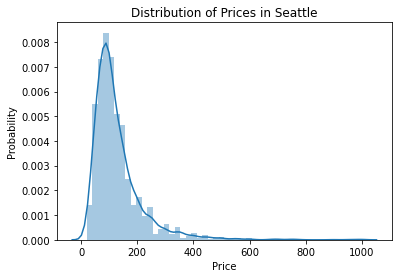

In [22]:
#Plot to show distribution of listing price

sns.distplot(df['price']);

plt.title("Distribution of Prices in Seattle")

plt.ylabel("Probability")

plt.xlabel("Price")

''

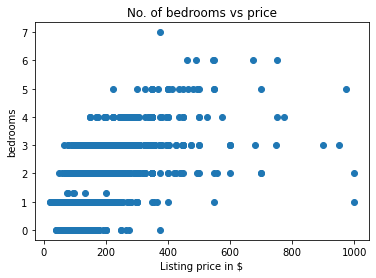

In [11]:
#Scatter plot to show relationship between price and bedrooms

plt.scatter(df['price'],df['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')
;

''

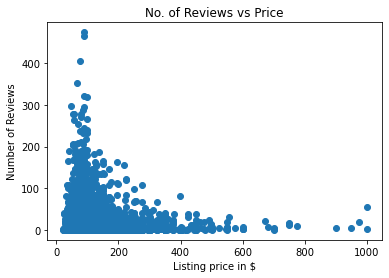

In [12]:
#Scatter plot to show relationship between price and number of reviews

plt.scatter(df['price'],df['number_of_reviews'])
plt.xlabel('Listing price in $')
plt.ylabel('Number of Reviews')
plt.title("No. of Reviews vs Price")
;

Text(0.5, 1.0, 'Property Type on Price')

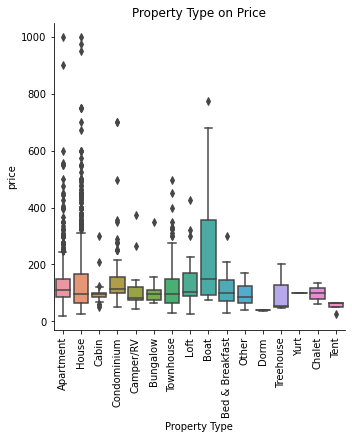

In [13]:
#relationship between property type and price

sns.factorplot('property_type','price',data=df, kind = 'box');

plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('price')
plt.title('Property Type on Price')

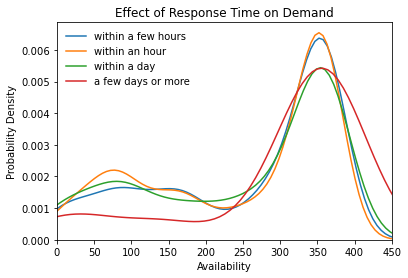

In [14]:
#Host reponse time effect on availability?

temp_df = df[['availability_365','host_response_time']]

tdf_1 = temp_df[(temp_df['host_response_time'] == 'within a few hours')]

tdf_2 = temp_df[(temp_df['host_response_time'] == 'within an hour')]

tdf_3 = temp_df[(temp_df['host_response_time'] == 'within a day')]

tdf_4 = temp_df[(temp_df['host_response_time'] == 'a few days or more')]


sns.distplot(tdf_1['availability_365'],hist=False,label = 'within a few hours')
sns.distplot(tdf_2['availability_365'],hist=False,label ='within an hour' )
sns.distplot(tdf_3['availability_365'],hist=False,label = 'within a day')
sns.distplot(tdf_4['availability_365'],hist=False,label = 'a few days or more')


plt.title('Effect of Response Time on Demand')
plt.xlabel('Availability')

plt.ylabel('Probability Density')

plt.legend(frameon = False)

plt.xlim(0,450);



Text(0.5, 1.0, 'Effect of Cleanliness on Price')

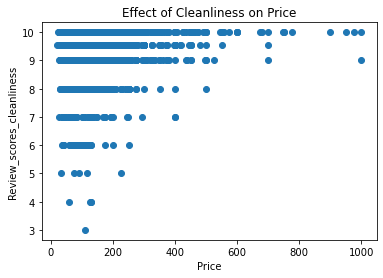

In [15]:
#Effect on cleanliness on price?

plt.scatter(df['price'],df['review_scores_cleanliness'])

plt.ylabel('Review_scores_cleanliness')
plt.xlabel('Price')

plt.title('Effect of Cleanliness on Price')

## Creating a Linear Regression model to try and predict price.


Creating dummy variables for categorical data


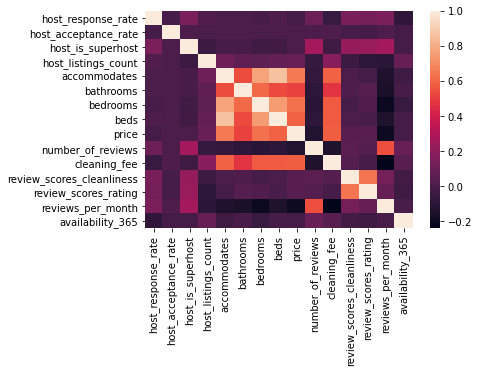

In [16]:
sns.heatmap(df.corr(),cbar=True);

In [17]:
#Getting categorical data

cat_var = df.select_dtypes(include='object')

cat_var


,host_response_time,zipcode,property_type,room_type,cancellation_policy
0,within a few hours,98119,Apartment,Entire home/apt,moderate
1,within an hour,98119,Apartment,Entire home/apt,strict
2,within a few hours,98119,House,Entire home/apt,strict
3,NaN,98119,Apartment,Entire home/apt,flexible
4,within an hour,98119,House,Entire home/apt,strict
...,...,...,...,...,...
3813,within a few hours,98107,House,Entire home/apt,strict
3814,within an hour,98102,Apartment,Entire home/apt,moderate
3815,NaN,98178,House,Entire home/apt,moderate
3816,within an hour,98112,Condominium,Entire home/apt,moderate


In [18]:
for col in cat_var.columns:
    df = pd.concat([df.drop(col,axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='-', drop_first=True)],axis=1)

In [19]:
df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,...,property_type-Loft,property_type-Other,property_type-Tent,property_type-Townhouse,property_type-Treehouse,property_type-Yurt,room_type-Private room,room_type-Shared room,cancellation_policy-moderate,cancellation_policy-strict
0,96.000000,100.000000,0,3.0,4,1.0,1.0,1.0,85.0,207,...,0,0,0,0,0,0,0,0,1,0
1,98.000000,100.000000,1,6.0,4,1.0,1.0,1.0,150.0,43,...,0,0,0,0,0,0,0,0,0,1
2,67.000000,100.000000,0,2.0,11,4.5,5.0,7.0,975.0,20,...,0,0,0,0,0,0,0,0,0,1
3,94.886798,99.967159,0,1.0,3,1.0,0.0,2.0,100.0,0,...,0,0,0,0,0,0,0,0,0,0
4,100.000000,99.967159,0,2.0,6,2.0,3.0,3.0,450.0,38,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,99.000000,100.000000,0,354.0,6,2.0,3.0,3.0,359.0,1,...,0,0,0,0,0,0,0,0,0,1
3814,100.000000,100.000000,0,1.0,4,1.0,1.0,2.0,79.0,2,...,0,0,0,0,0,0,0,0,1,0
3815,94.886798,99.967159,0,1.0,2,1.0,1.0,1.0,93.0,0,...,0,0,0,0,0,0,0,0,1,0
3816,100.000000,99.967159,0,1.0,2,1.0,0.0,1.0,99.0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
#Split the data into test and train set 

X = df.drop('price',axis=1)

y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state = 42)

#Instantiate model: I have chosen fit_intercept = False because when fit_intercept = False the model predicts very high values
#for the test data.

lm_model = LinearRegression(normalize=True,fit_intercept=False)


#Train the model

lm_model.fit(X_train,y_train)

#Predict using x test values

y_test_pred = lm_model.predict(X_test)

y_train_pred = lm_model.predict(X_train)


#Measure r2 score

test_r2_score = r2_score(y_test,y_test_pred)
train_r2_score = r2_score(y_train,y_train_pred)

print("Test R2 score: {}".format(test_r2_score))
print("Train R2 score: {}".format(train_r2_score))



Test R2 score: 0.6052817976735279
Train R2 score: 0.6091169701684981


''

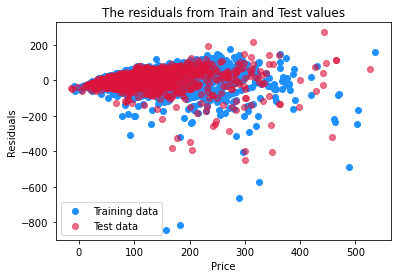

In [24]:
plt.scatter(y_train_pred,y_train_pred - y_train,color = 'dodgerblue')
plt.scatter(y_test_pred,y_test_pred - y_test, color='crimson',alpha=.6)

plt.ylabel('Residuals')
plt.xlabel('Price')

plt.title("The residuals from Train and Test values")

plt.legend(['Training data','Test data'])


;

In [25]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm_model.coef_))], axis = 1)

column_names = ['Features','coef_']

coefficients.columns = column_names


pd.options.display.max_rows = 100

coefficients.sort_values(by='coef_',ascending=False).reset_index()

,index,Features,coef_
0,45,property_type-Boat,115.865215
1,36,zipcode-98134,49.849001
2,48,property_type-Camper/RV,47.790520
3,53,property_type-Loft,23.987086
4,6,bedrooms,23.824663
5,58,property_type-Yurt,23.732776
6,49,property_type-Chalet,23.632267
7,5,bathrooms,22.444409
8,44,property_type-Bed & Breakfast,18.906829
9,57,property_type-Treehouse,13.520911
